In [47]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
%matplotlib widget
from geopandas import GeoSeries
import os
import h5py
from shapely.geometry import Point,Polygon
import glob
from rasterio import features
from topolib import gda_lib

In [2]:
ATL06_list = glob.glob('/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/*.h5')

In [3]:
ATL06_list

['/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20181214194017_11790102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20181115210428_07370102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20190111063212_02110206_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20190214164413_07370202_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20181110092841_06530106_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20190209050825_06530206_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20190112181620_02340202_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20181213075606_11560106_001_01.h5']

In [4]:
ATL06_fn = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/processed_ATL06_20181110092841_06530106_001_01.h5'

# read a Raster Data

In [5]:

dem_fn = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/USCOGM20160604f1a1_bareDEM_3p0m.tif'
ds = rasterio.open(dem_fn)

# read a ATL06 hdf5 into a geodataframe

In [6]:
dataset_dict={'land_ice_segments':['h_li', 'delta_time','longitude','latitude'], 'land_ice_segments/ground_track':['x_atc']}

In [7]:
ATL06_gdf = gda_lib.ATL06_2_gdf(ATL06_fn,dataset_dict)
ATL06_gdf = ATL06_gdf.to_crs(ds.crs)

In [8]:
dem = ds.read(1)
dem = np.ma.masked_equal(dem,gda_lib.get_ndv(ds))

In [9]:
xmin,ymin,xmax,ymax = ds.bounds

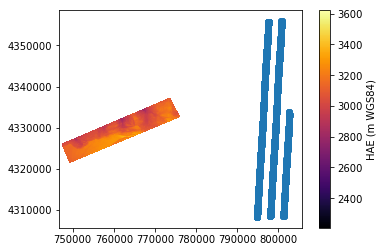

In [10]:
fig,ax = plt.subplots()
im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
plt.colorbar(im,label='HAE (m WGS84)')
ATL06_gdf.plot(ax=ax)

In [11]:
ATL06_gdf.head()

,h_li,delta_time,longitude,latitude,x_atc,pair,beam,p_b,geometry
0,2567.759033,2.707764e+07,-107.500013,39.094286,1.572077e+07,1.0,0.0,1.0_0.0,POINT (802706.2921725033 4333073.953045337)
1,2570.402832,2.707764e+07,-107.500033,39.094106,1.572079e+07,1.0,0.0,1.0_0.0,POINT (802705.2907672024 4333053.91556992)
2,2574.306396,2.707764e+07,-107.500054,39.093926,1.572081e+07,1.0,0.0,1.0_0.0,POINT (802704.255851483 4333033.884023974)
3,2578.582031,2.707764e+07,-107.500075,39.093746,1.572083e+07,1.0,0.0,1.0_0.0,POINT (802703.2260833569 4333013.849857506)
4,2583.051025,2.707764e+07,-107.500096,39.093566,1.572085e+07,1.0,0.0,1.0_0.0,POINT (802702.2015954845 4332993.813512066)


In [33]:
for x in ATL06_list:
    print(gda_lib.ATL06_2_gdf(x,dataset_dict))

             h_li    delta_time   longitude   latitude         x_atc  pair  \
0             NaN  3.005180e+07 -107.839876  38.875004  4.325630e+06   1.0   
1             NaN  3.005180e+07 -107.839898  38.875186  4.325650e+06   1.0   
2             NaN  3.005180e+07 -107.839920  38.875367  4.325670e+06   1.0   
3             NaN  3.005180e+07 -107.839941  38.875546  4.325690e+06   1.0   
4             NaN  3.005180e+07 -107.839963  38.875724  4.325710e+06   1.0   
5             NaN  3.005180e+07 -107.839986  38.875906  4.325730e+06   1.0   
6     2008.933838  3.005180e+07 -107.840008  38.876086  4.325750e+06   1.0   
7     2008.607910  3.005180e+07 -107.840031  38.876266  4.325770e+06   1.0   
8     2008.004883  3.005180e+07 -107.840053  38.876446  4.325790e+06   1.0   
9     2007.555054  3.005180e+07 -107.840076  38.876625  4.325810e+06   1.0   
10    2007.105957  3.005180e+07 -107.840099  38.876805  4.325830e+06   1.0   
11    2006.441895  3.005180e+07 -107.840121  38.876985  4.325850

In [12]:
ATL06_gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in ATL06_list]
ATL06_gdf_list = [x.to_crs(ds.crs) for x in ATL06_gdf_list]

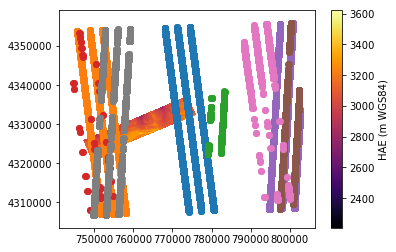

In [13]:
fig,ax = plt.subplots()
im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
plt.colorbar(im,label='HAE (m WGS84)')
for gdf in ATL06_gdf_list:
    gdf.plot(ax=ax)
#ATL06_gdf.plot(ax=ax)

In [32]:
ATL06_gdf_lists

[             h_li    delta_time   longitude   latitude         x_atc  pair  \
 0             NaN  3.005180e+07 -107.839876  38.875004  4.325630e+06   1.0   
 1             NaN  3.005180e+07 -107.839898  38.875186  4.325650e+06   1.0   
 2             NaN  3.005180e+07 -107.839920  38.875367  4.325670e+06   1.0   
 3             NaN  3.005180e+07 -107.839941  38.875546  4.325690e+06   1.0   
 4             NaN  3.005180e+07 -107.839963  38.875724  4.325710e+06   1.0   
 5             NaN  3.005180e+07 -107.839986  38.875906  4.325730e+06   1.0   
 6     2008.933838  3.005180e+07 -107.840008  38.876086  4.325750e+06   1.0   
 7     2008.607910  3.005180e+07 -107.840031  38.876266  4.325770e+06   1.0   
 8     2008.004883  3.005180e+07 -107.840053  38.876446  4.325790e+06   1.0   
 9     2007.555054  3.005180e+07 -107.840076  38.876625  4.325810e+06   1.0   
 10    2007.105957  3.005180e+07 -107.840099  38.876805  4.325830e+06   1.0   
 11    2006.441895  3.005180e+07 -107.840121  38.876

In [27]:
df1,df2,df3,df4,df5,df6 = [x for x_,x in ATL06_gdf_list[1].groupby(ATL06_gdf_list[1]['p_b'])] #pick 1 ATL06 and seperate it into 6 beams

In [28]:
df_list = [df1,df2,df3,df4,df5,df6]

FigureCanvasNbAgg()

ValueError: operands could not be broadcast together with shapes (882,) (2350,) 

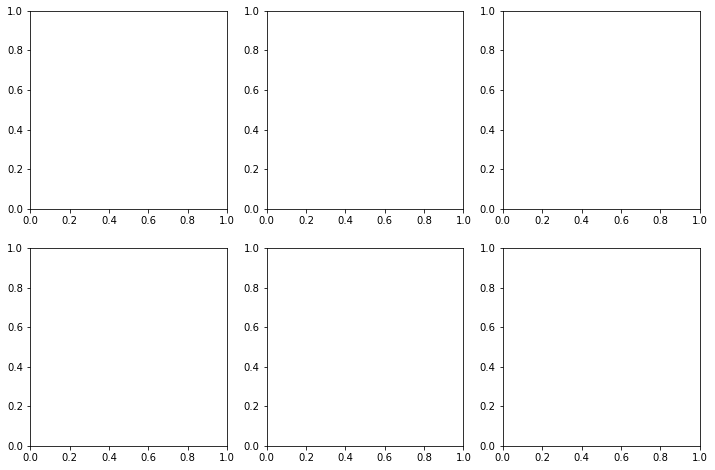

In [50]:
fig,axs = plt.subplots(2,3,figsize=(12,8))
for i,ax in enumerate(fig.axes):
    x_atc,z_hp = gda_lib.sample_near_nbor(ds,df_list[i])
    #xmin=np.min(x_atc)
    ##xmax=xmin+1000    #np.min(x_atc)
    #ymin=np.min(z_hp)+100
    #ymax=np.max(z_hp)
    diff = z_hp-df_list[i].h_li.values
    ax.scatter(x_atc,diff,label='DEM Elevation')
    #ax.scatter(df_list[i].x_atc.values,df_list[i].h_li.values,marker='^',c='red',s=8,label='ATL06') #this is nearest neighbour sampling
    ax.legend()   
    #ax.set_xlim([xmin,xmax])
    #ax.set_ylim([ymin,ymax])
plt.suptitle('Nearest neighbour sampling')
#ax.scatter(gdf_6_p1b1.x_atc.values,gdf_6_p1b1.h_li.values,marker='^',c='red',s=1)

In [52]:
df_test = gda_lib.buffer_sampler(ds,df_list[0],20,ret_gdf=True)

In [54]:
df_test['snow_on_off'] = df_test['h_li']-df_test['med']

FigureCanvasNbAgg()

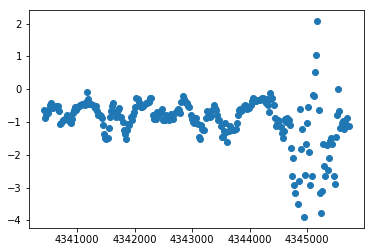

In [55]:
fig,ax = plt.subplots()
ax.scatter(df_test['x_atc'],df_test['snow_on_off'])

FigureCanvasNbAgg()

ValueError: operands could not be broadcast together with shapes (882,) (2350,) 

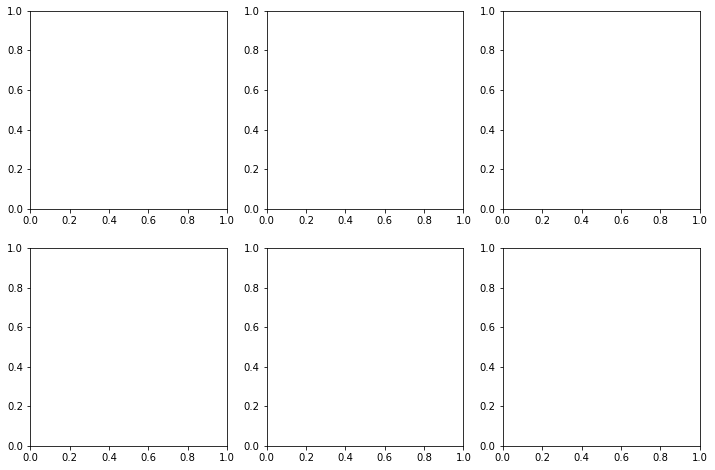

In [51]:
fig,axs = plt.subplots(2,3,figsize=(12,8))
for i,ax in enumerate(fig.axes):
    x_atc,z_hp = gda_lib.buffer_sampler(ds,df_list[i],20) #this is buffer sampling
    diff = z_hp-df_list[i].h_li.values
    #ax.scatter(x_atc,z_hp,label='DEM Elevation')
    ax.scatter(x_atc,diff,label='DEM Elevation')
    #ax.scatter(df_list[i].x_atc.values,df_list[i].h_li.values,marker='^',c='red',s=1,label='ATL06') 
    ax.legend()   
plt.suptitle('Buffer sampling with window radius of 20 m')
#ax.scatter(gdf_6_p1b1.x_atc.values,gdf_6_p1b1.h_li.values,marker='^',c='red',s=1)

In [31]:
#not important from here on

In [47]:
def mask_by_shp(geom,array,ds,reverse=False): 
    if (type(ds) == rasterio.io.DatasetReader):
        transform = ds.transform
    else:
        transform = affine.Affine.from_gdal(*ds.GetGeoTransform())
    shp = features.rasterize(geom,out_shape=np.shape(array),fill=-9999,transform=transform,dtype=float)
    shp_mask = np.ma.masked_where(shp==-9999,shp)
    if reverse:
        req_mask = ~shp_mask.mask
    else:
        req_mask = shp_mask.mask
    masked_array = np.ma.array(array,mask=req_mask)
    return masked_array

In [53]:
def median_profile(ds,geom,buff,val='med'):
    """
    sample values from raster at the given ICESat-2 points
    using a buffer distance, and return median/mean
    """
    # reproject the shapefile to raster projection
    x_min,y_min,x_max,y_max = ds.bounds
    geom = geom.to_crs(ds.crs)
    #filter geom outside bounds 
    geom = geom.cx[x_min:x_max,y_min:y_max]
    #adjust for no data
    no_data = get_ndv(ds)
    array = ds.read(1)
    array = np.ma.masked_equal(array,no_data)
    geom['geometry'] = geom.geometry.buffer(buff)
   # print(type(geom))
    out_list = []
    for i,row in geom.iterrows():
       # print(type(row))
        poly_array =  mask_by_shp(GeoSeries(row.geometry),array,ds)
        if val == 'med':
            out = np.ma.median(poly_array)
        else:
            out = np.ma.mean(poly_array)
        out_list.append(out)
    return geom.x_atc.values, out_list

In [112]:
array = ds.read(1,masked=True)

In [54]:
median_profile(ds,df_list[2],20)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


KeyboardInterrupt: 

In [115]:
ds.nodata ==None

True

In [116]:
ds.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 9955, 'height': 5857, 'count': 1, 'crs': CRS.from_epsg(32612), 'transform': Affine(3.0, 0.0, 746619.0,
       0.0, -3.0, 4338012.0), 'tiled': False, 'interleave': 'band'}

In [4]:
import gdal


In [5]:
band = gdal.Open(dem_fn,2).GetRasterBand(1)

In [6]:
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fba046ed4e0> >

In [ ]:
band.GetNoDataValue()

In [1]:
band.GetNoDataValue()

NameError: name 'band' is not defined

In [10]:
def get_ndv(ds):
    no_data = ds.nodatavals[0]
    if no_data == None:
        #this means no data is not set in tif tag, nead to cheat it from raster
        ndv = ds.read(1)[0,0]
    else:
        ndv = no_data
    return ndv

In [67]:
dem

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [57]:
df_buffered = df_list[5].copy()
df_buffered['geometry'] = df_buffered.geometry.buffer(20)

In [68]:
dem_filled = np.ma.filled(dem,np.nan)

In [73]:
dem_filled

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [69]:
import rasterstats as rs

In [91]:
profile_stats = gpd.GeoDataFrame.from_features(rs.zonal_stats(df_buffered,dem,affine=ds.transform,geojson_out=True,stats="median",nodata=-9999))

In [92]:
profile_stats = profile_stats.rename(columns={'median':'med'})

In [94]:
profile_stats.head()

,beam,delta_time,filename,geometry,h_li,latitude,longitude,med,p_b,pair,x_atc
0,1.0,2.992328e+07,/home/jovyan/data/gm_noCoverage_ICESat2/proces...,"POLYGON ((752773.3263820586 4354161.339010223,...",2109.107178,39.299962,-108.068931,NaN,3.0_1.0,3.0,1.569845e+07
1,1.0,2.992328e+07,/home/jovyan/data/gm_noCoverage_ICESat2/proces...,"POLYGON ((752771.9874215935 4354141.33305324, ...",2103.466797,39.299782,-108.068954,NaN,3.0_1.0,3.0,1.569847e+07
2,1.0,2.992328e+07,/home/jovyan/data/gm_noCoverage_ICESat2/proces...,"POLYGON ((752770.6514802576 4354121.325010256,...",2094.860352,39.299603,-108.068977,NaN,3.0_1.0,3.0,1.569849e+07
3,1.0,2.992328e+07,/home/jovyan/data/gm_noCoverage_ICESat2/proces...,"POLYGON ((752769.3620773242 4354101.314930591,...",2086.094971,39.299423,-108.068999,NaN,3.0_1.0,3.0,1.569851e+07
4,1.0,2.992328e+07,/home/jovyan/data/gm_noCoverage_ICESat2/proces...,"POLYGON ((752768.0751188451 4354081.304702571,...",2074.346680,39.299243,-108.069021,NaN,3.0_1.0,3.0,1.569853e+07


In [90]:
fig,ax = plt.subplots()
ax.scatter(profile_stats.x_atc.values,profile_stats.med.values)

FigureCanvasNbAgg()

In [114]:
def buffer_sampler(ds,geom,buffer,val='median',ret_gdf=False):
    """
    sample values from raster at the given ICESat-2 points
    using a buffer distance, and return median/mean or a full gdf ( if return gdf=True)
    Inputs = rasterio dataset, Geodataframe containing points, buffer distance, output value = median/mean (default median)
    and output format list of x_atc,output_value arrays (default) or  full gdf
    """
    ndv = get_ndv(ds)
    array = ds.read(1)
    gt = ds.transform
    stat = val
    geom = geom.to_crs(ds.crs)
    geom['geometry'] = geom.geometry.buffer(buffer)
    json_stats = rs.zonal_stats(geom,array,affine=gt,geojson_out=True,stats=stat,nodata=ndv)
    gdf = gpd.GeoDataFrame.from_features(json_stats)
    if val =='median':
        gdf = gdf.rename(columns={'median':'med'})
        call = 'med'
    else:
        gdf = gdf.rename(columns={'mean':'avg'})
        call = 'avg'
    if ret_gdf:
        out_file = gdf
    else:
        out_file = [gdf.x_atc.values,gdf[call].values]
    return out_file

In [1]:
from topolib import gda_lib

In [29]:
x,y = gda_lib.buffer_sampler(ds,df_list[5],20,'mean')

In [32]:
!pwd

/home/jovyan/topohack/ShashankBice
